In [1]:
import pandas as pd

df = pd.read_csv("Task_5.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
print(df.isna().sum())

df.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
if df.duplicated().sum() > 0:
    print(f"Found {df.duplicated().sum()} duplicate rows.")
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")
else:
    print("No duplicate rows found.")

Found 723 duplicate rows.
Duplicates have been removed.


In [4]:
import numpy as np
from scipy import stats

col = df.select_dtypes(include=[np.number]).columns
z_score = np.abs(stats.zscore(df[col]))
print(z_score)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.267966  0.682656  0.935208  0.376556  0.667728  0.418446  0.901657   
1    0.157260  0.682656  0.935208  0.478910  0.841918  2.389793  1.002541   
2    1.724733  0.682656  0.935208  0.764066  1.403197  0.418446  0.901657   
3    0.728383  0.682656  0.935208  0.935159  0.841918  0.418446  0.901657   
4    0.839089  1.464866  0.935208  0.364848  0.919336  2.389793  0.901657   
..        ...       ...       ...       ...       ...       ...       ...   
723  1.503322  1.464866  1.005911  0.661712  0.687083  0.418446  1.002541   
733  1.153610  1.464866  1.005911  1.346085  2.041893  0.418446  0.901657   
739  0.267966  0.682656  0.935208  0.205463  0.164513  0.418446  0.901657   
843  0.506972  0.682656  1.976470  1.619532  0.512893  0.418446  1.002541   
878  0.046555  0.682656  0.935208  0.661712  1.132235  0.418446  0.901657   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [5]:
z_score.max()

age         2.814192
sex         1.464866
cp          1.976470
trestbps    3.900776
chol        6.145034
fbs         2.389793
restecg     2.805854
thalach     3.436149
exang       1.431958
oldpeak     4.447460
slope       2.271182
ca          3.264871
thal        3.781916
target      1.090140
dtype: float64

In [6]:
df = df[(z_score < 3).all(axis=1)]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
 13  target    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB
None


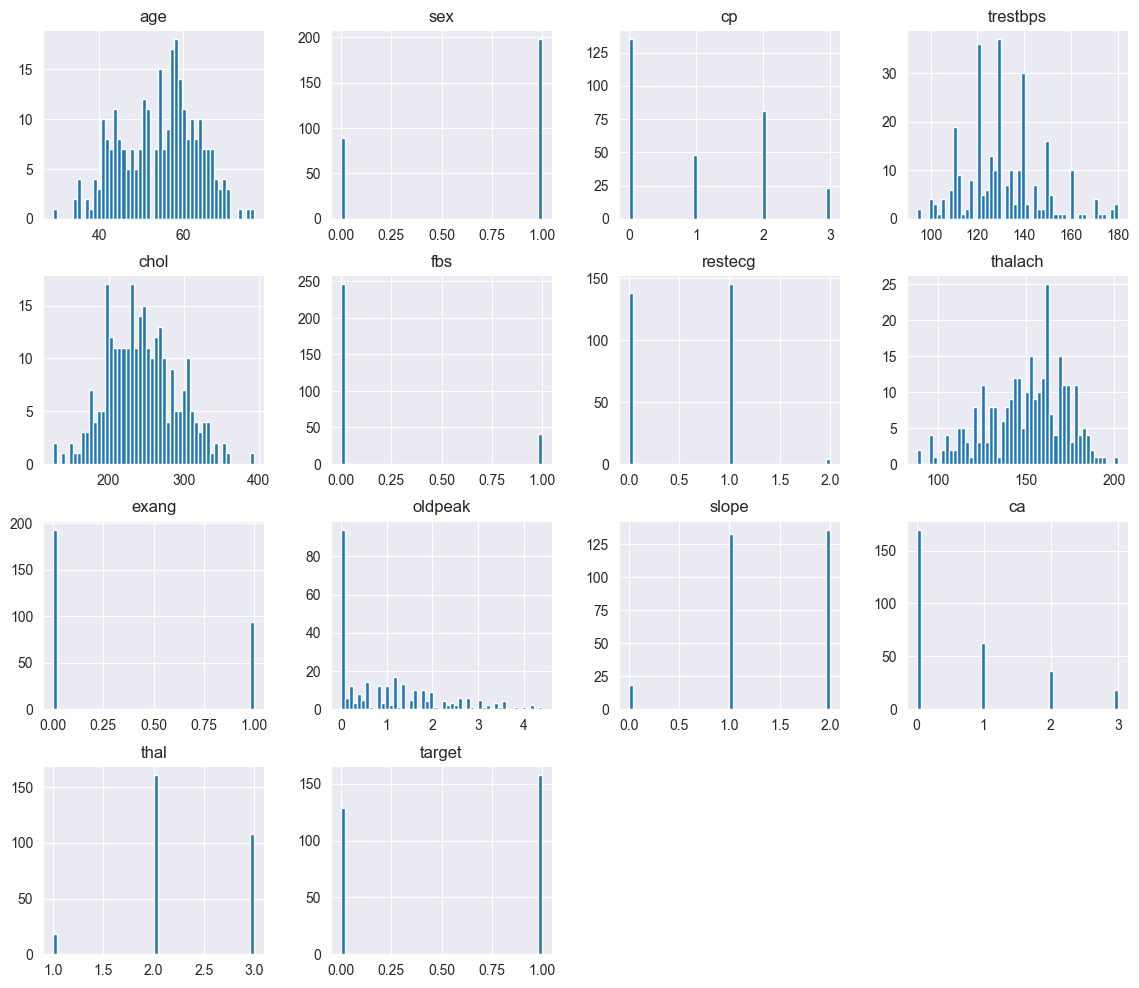

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')
df.hist(bins = 50, figsize=(14,12))
plt.show()

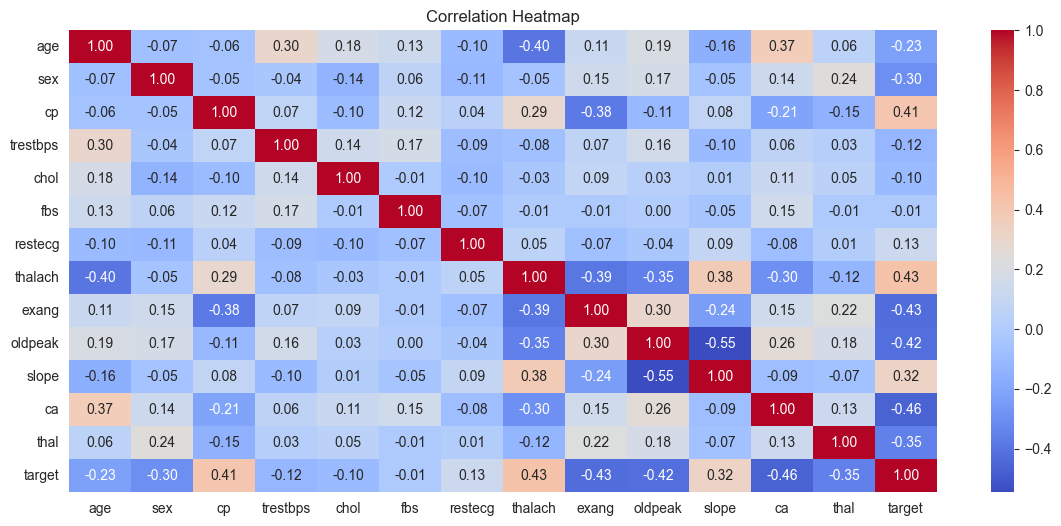

In [9]:
plt.figure(figsize=(14,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

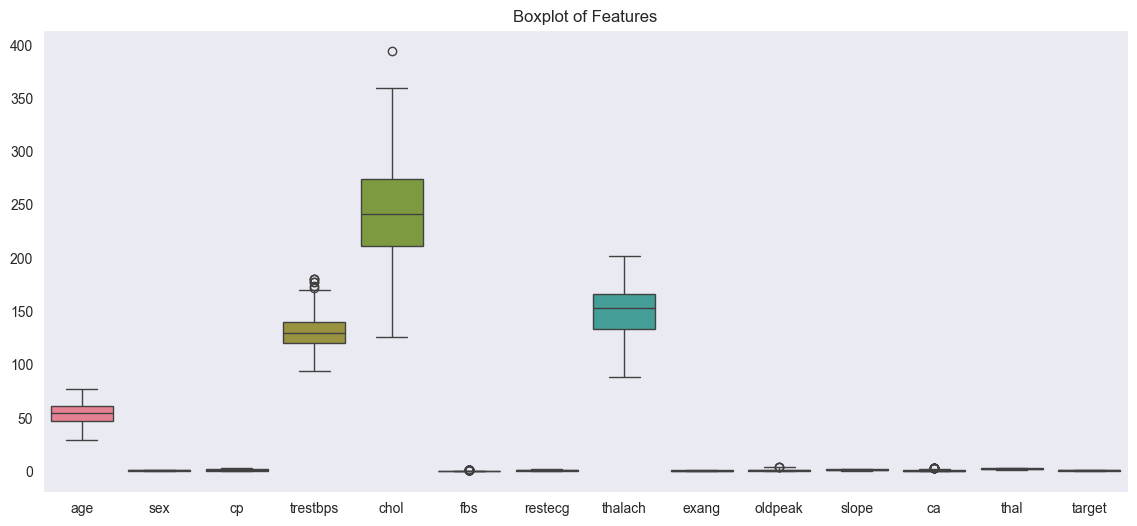

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.show()

What is the meaan age of the patients ?

54.33449477351916


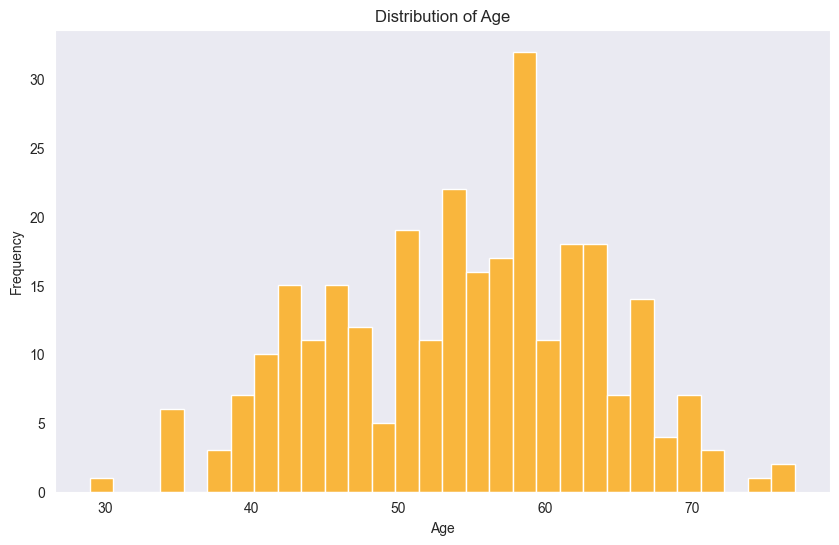

In [11]:
print(df.age.mean())

plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

What is the amount of cholesterol found in the patients ?

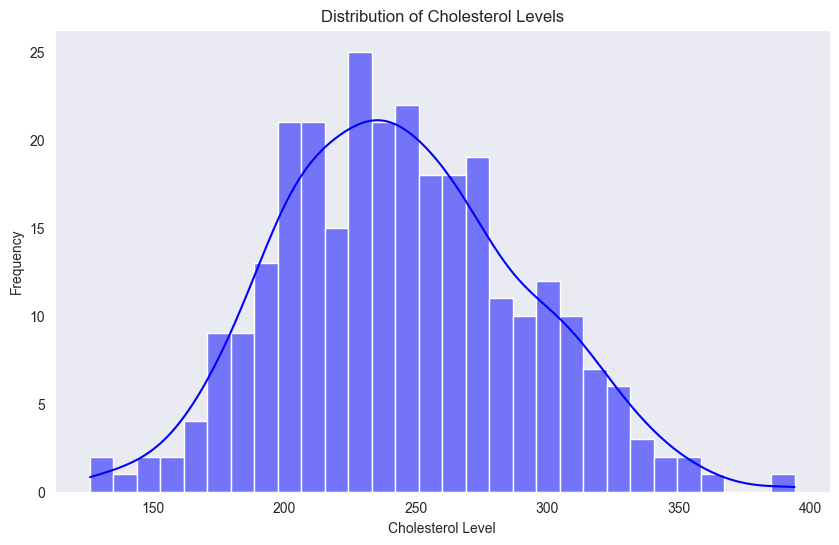

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['chol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

How do cholesterol levels relate to the likelihood of heart disease?

C:\Users\arnab\AppData\Local\Temp\ipykernel_18116\3346018343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')


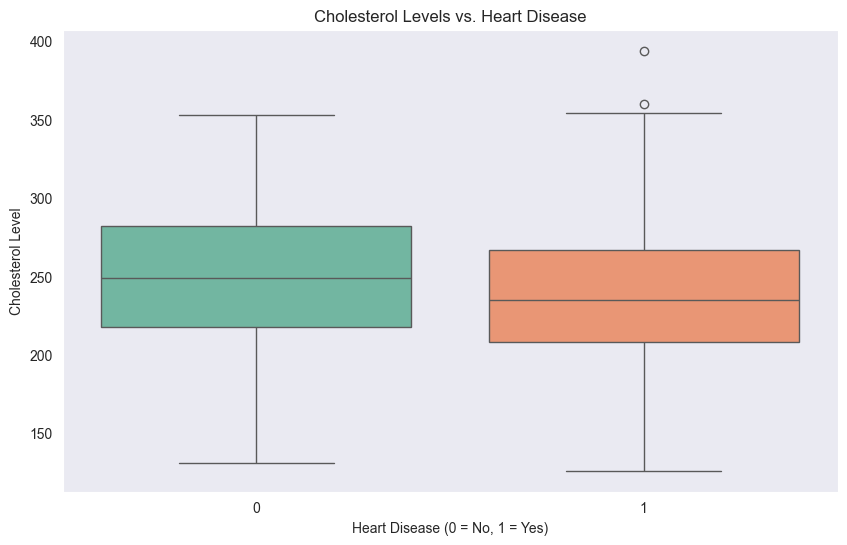

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

How does the type of chest pain relate to the likelihood of heart disease?

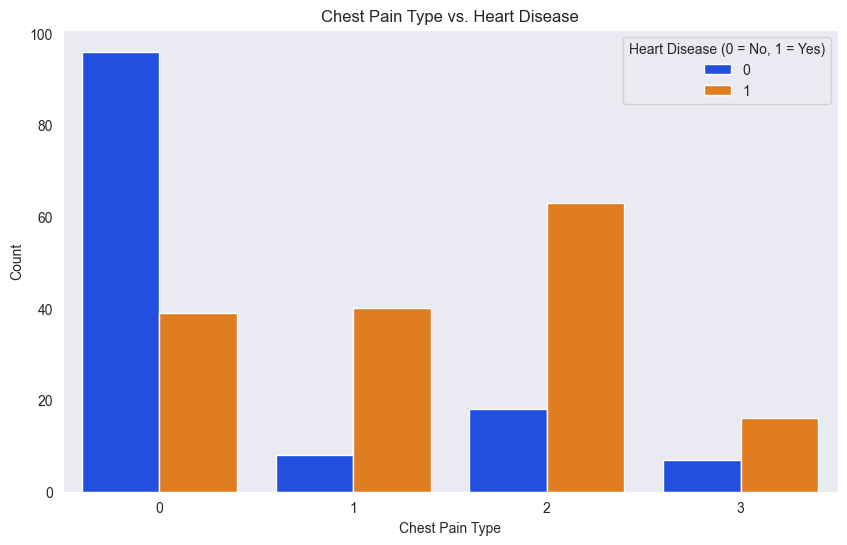

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='bright')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()

What is the relationship between cholesterol levels and Thalach ?

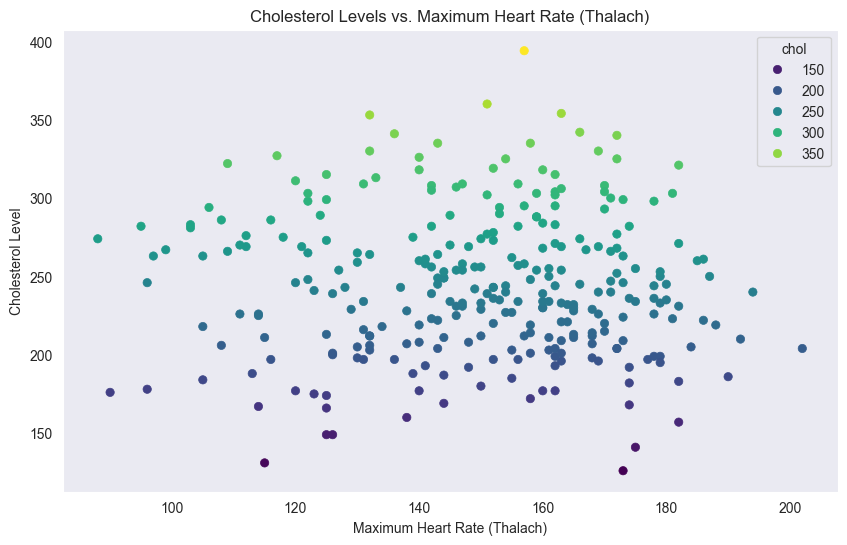

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='thalach', y='chol', data=df, hue='chol', palette='viridis', edgecolor=None)
plt.title('Cholesterol Levels vs. Maximum Heart Rate (Thalach)')
plt.xlabel('Maximum Heart Rate (Thalach)')
plt.ylabel('Cholesterol Level')
plt.show()

What is the relationship between age and the likelihood of heart disease ?

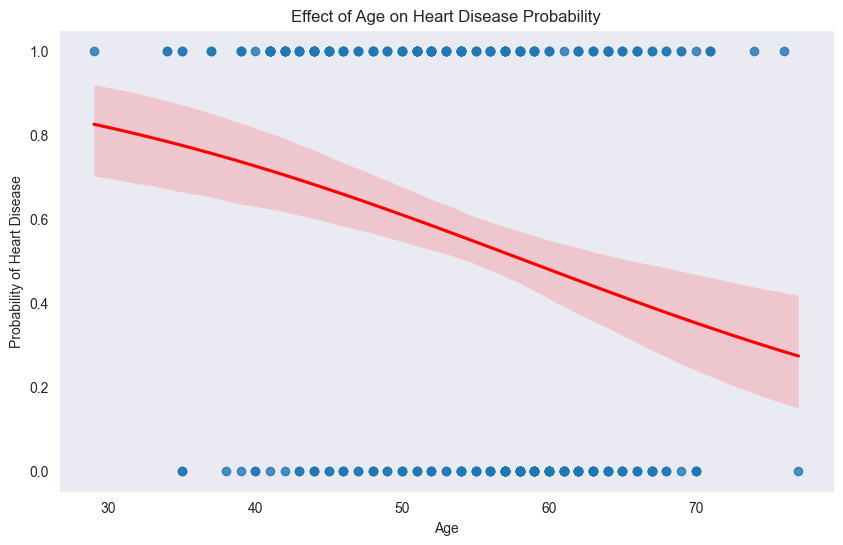

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='target', data=df, logistic=True, line_kws={"color": "red"})
plt.title('Effect of Age on Heart Disease Probability')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.show()

How does the relationship between age and heart disease risk vary with different chest pain types?

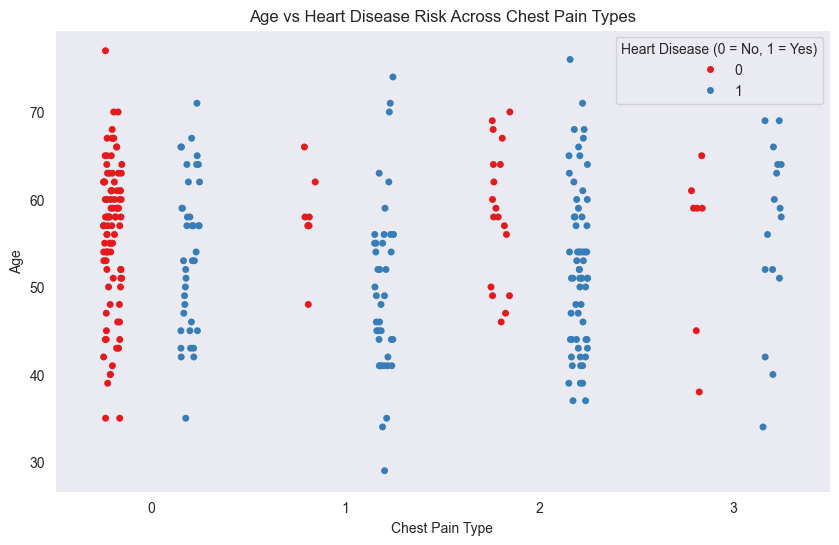

In [17]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='cp', y='age', hue='target', data=df, jitter=True, palette='Set1', dodge=True)
plt.title('Age vs Heart Disease Risk Across Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()

How does the effect of oldpeak vary with different slopes of the peak exercise ST segment?

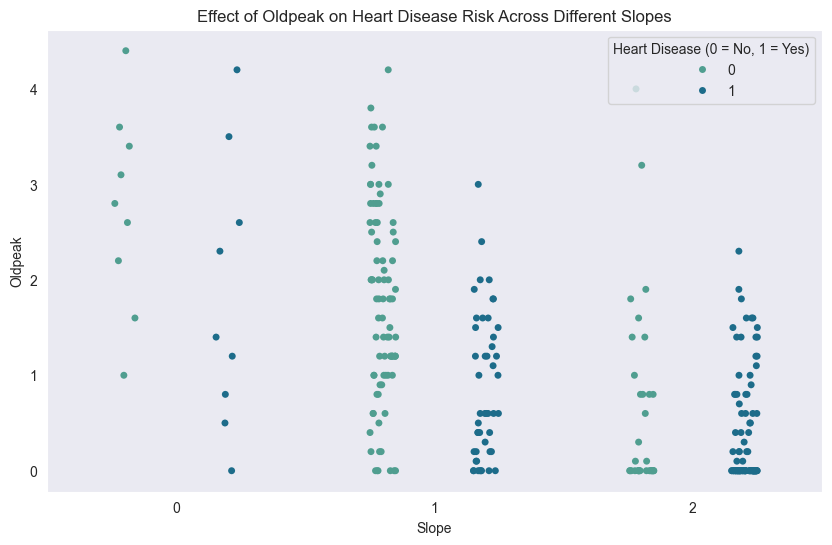

In [18]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='slope', y='oldpeak', hue='target', data=df, palette='crest', jitter=True, dodge=True)
plt.title('Effect of Oldpeak on Heart Disease Risk Across Different Slopes')
plt.xlabel('Slope')
plt.ylabel('Oldpeak')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()